In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from joblib import dump, load
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append(r'D:\Hacks\re_new')

In [2]:
from src.utils import load_config, load_data, comp_score
from src.engine import get_model

config = load_config()
random_seed = config['RAND']

In [3]:
train_data = pd.read_csv('../data/raw/train.csv')
test_data = pd.read_csv('../data/raw/test.csv')
train_data.shape, test_data.shape

((909604, 16), (303202, 15))

In [4]:
train_t1, test_t1 = load_data()
train_t1.shape, test_t1.shape

((909604, 21), (303202, 20))

# Ft. Eng.

## Date time ft.eng

In [5]:
df = pd.concat([train_data, test_data], axis=0)
df.shape

(1212806, 16)

In [6]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.sort_values(by='timestamp', inplace=True)
df

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
45421,2021-01-01 00:01:00,828.392253,847.524780,23.749945,1164.353088,56.914901,833.398712,23.851615,23.613581,138.066790,166.923848,228.054690,8.184143,0.535525,Turbine_108,43.430870
658721,2021-01-01 00:02:00,734.902262,751.122874,19.137422,1119.673584,55.196616,809.185425,27.618101,25.004128,124.705297,153.301956,43.115978,6.780914,0.600904,Turbine_120,40.715544
545675,2021-01-01 00:03:00,748.204336,767.003316,19.113608,1128.340881,55.682657,804.593099,27.610003,25.033796,122.845019,157.638268,43.992285,6.605300,0.533855,Turbine_120,40.706413
772206,2021-01-01 00:04:00,1115.585986,1143.363770,18.536383,1200.487305,62.660133,1161.573462,25.932306,24.076670,192.730591,224.663141,72.256642,8.286794,0.523392,Turbine_139,40.769313
245502,2021-01-01 00:06:00,975.188029,1005.913961,25.460711,1200.243095,57.926095,1018.267802,26.737586,23.928331,158.431951,196.259565,50.205800,7.899686,0.339865,Turbine_158,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554025,2021-12-31 23:58:00,635.630473,647.702566,9.400681,973.038859,49.969453,625.765503,30.920345,26.883738,106.336980,139.864756,123.650436,6.972114,0.578641,Turbine_103,42.614979
83942,2021-12-31 23:58:00,951.135590,977.182892,8.780563,1197.069234,58.330886,902.190328,20.349027,21.095316,157.545405,194.551659,78.606181,7.534583,0.606685,Turbine_105,43.700722
668082,2021-12-31 23:58:00,858.007161,885.301178,31.106428,1178.025533,59.719817,807.887004,30.799557,27.352941,146.320142,172.715530,212.963961,7.155286,0.445924,Turbine_20,43.792723
214355,2021-12-31 23:58:00,908.267832,933.286235,18.620179,1198.289958,57.573762,779.126373,30.178709,25.337340,137.384988,180.152397,69.111694,7.281371,0.530622,Turbine_13,43.219498


In [7]:
def add_features(df):
    df['timestamp'] = pd.to_datetime(df.timestamp)
    df['month'] = df.timestamp.dt.month
    df['hour'] = df.timestamp.dt.hour
    df['dayofweek'] = df.timestamp.dt.dayofweek
    df['dayofmonth'] = df.timestamp.dt.day
    df['mmtt'] = df['month'].astype(str) + '_' + df['turbine_id']
    return df

In [8]:
df = add_features(df)
df

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,...,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target,month,hour,dayofweek,dayofmonth,mmtt
45421,2021-01-01 00:01:00,828.392253,847.524780,23.749945,1164.353088,56.914901,833.398712,23.851615,23.613581,138.066790,...,228.054690,8.184143,0.535525,Turbine_108,43.430870,1,0,4,1,1_Turbine_108
658721,2021-01-01 00:02:00,734.902262,751.122874,19.137422,1119.673584,55.196616,809.185425,27.618101,25.004128,124.705297,...,43.115978,6.780914,0.600904,Turbine_120,40.715544,1,0,4,1,1_Turbine_120
545675,2021-01-01 00:03:00,748.204336,767.003316,19.113608,1128.340881,55.682657,804.593099,27.610003,25.033796,122.845019,...,43.992285,6.605300,0.533855,Turbine_120,40.706413,1,0,4,1,1_Turbine_120
772206,2021-01-01 00:04:00,1115.585986,1143.363770,18.536383,1200.487305,62.660133,1161.573462,25.932306,24.076670,192.730591,...,72.256642,8.286794,0.523392,Turbine_139,40.769313,1,0,4,1,1_Turbine_139
245502,2021-01-01 00:06:00,975.188029,1005.913961,25.460711,1200.243095,57.926095,1018.267802,26.737586,23.928331,158.431951,...,50.205800,7.899686,0.339865,Turbine_158,NaN,1,0,4,1,1_Turbine_158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554025,2021-12-31 23:58:00,635.630473,647.702566,9.400681,973.038859,49.969453,625.765503,30.920345,26.883738,106.336980,...,123.650436,6.972114,0.578641,Turbine_103,42.614979,12,23,4,31,12_Turbine_103
83942,2021-12-31 23:58:00,951.135590,977.182892,8.780563,1197.069234,58.330886,902.190328,20.349027,21.095316,157.545405,...,78.606181,7.534583,0.606685,Turbine_105,43.700722,12,23,4,31,12_Turbine_105
668082,2021-12-31 23:58:00,858.007161,885.301178,31.106428,1178.025533,59.719817,807.887004,30.799557,27.352941,146.320142,...,212.963961,7.155286,0.445924,Turbine_20,43.792723,12,23,4,31,12_Turbine_20
214355,2021-12-31 23:58:00,908.267832,933.286235,18.620179,1198.289958,57.573762,779.126373,30.178709,25.337340,137.384988,...,69.111694,7.281371,0.530622,Turbine_13,43.219498,12,23,4,31,12_Turbine_13


# Modelling

## Train test split

In [9]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, random_state=random_seed, shuffle=True)
for fold, (tr_id, te_id) in enumerate(kf.split(train_t1)):
    if fold == 7:
        Xtrain_t1  = train_t1.iloc[tr_id].drop(['timestamp', 'Target'], axis=1)
        Xval_t1 = train_t1.iloc[te_id].drop(['timestamp', 'Target'], axis=1)
        ytrain_t1 = train_t1.iloc[tr_id]['Target']
        yval_t1 = train_t1.iloc[te_id]['Target']
        break

Xtrain_t1.shape, Xval_t1.shape, ytrain_t1.shape, yval_t1.shape    # evaluating on fold 7

((818644, 19), (90960, 19), (818644,), (90960,))

## Init models

In [10]:
from catboost import CatBoostRegressor
from category_encoders.target_encoder import TargetEncoder
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

cat_cols = [ 'mmtt']

In [11]:
# xt = ExtraTreesRegressor(n_estimators=55, random_state=config['RAND'], verbose=1, n_jobs=-1)
# tme = TargetEncoder()
# # pf = PolynomialFeatures(degree=2)
# # pca = PCA(n_components=10, random_state=config['RAND'])
# scaler = StandardScaler()
# ct = make_column_transformer(
#     (tme, cat_cols),
#     remainder = 'passthrough'
# )
# xt_pipe = make_pipeline(
#     ct,
#     # scaler,
#     xt
# )

# print(xt_pipe)   # cur baseline - 0.002435

In [14]:
xgb = XGBRegressor(tree_method='gpu_hist', random_state=config['RAND'], n_estimators=3000, n_jobs=-1, verbose=False)
tme = TargetEncoder()
# pf = PolynomialFeatures(degree=2)
# pca = PCA(n_components=10, random_state=config['RAND'])
scaler = StandardScaler()
ct = make_column_transformer(
    (tme, cat_cols),
    remainder = 'passthrough'
)
xgb_pipe = make_pipeline(
    ct,
    # scaler,
    xgb
)

print(xgb_pipe)  # cur baseline - 0.005532

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('targetencoder',
                                                  TargetEncoder(),
                                                  ['mmtt'])])),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              ga...policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=None,
                              max_leaves=None, 

## Baseline fits
- cur xgb_pipe baseline - 0.005543
- cur xt_pipe baseline - 0.002435

In [31]:
# xgb_pipe.fit(Xtrain_t1, ytrain_t1)
# xgb_preds = xgb_pipe.predict(Xval_t1)
# print(comp_score(yval_t1, xgb_preds))
# # fit time - 1ms

[17:46:53] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


0.005543603346135948


In [33]:
# xt_pipe.fit(Xtrain_t1, ytrain_t1)
# xt_preds = xt_pipe.predict(Xval_t1)
# print(comp_score(yval_t1, xt_preds))
# # fit time - 4m33s

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:  4.2min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   13.6s


0.0024672581409048173


[Parallel(n_jobs=8)]: Done  55 out of  55 | elapsed:   19.2s finished


In [34]:
# # temp model saving
# dump(xt_pipe, '../models/xt_pipe_t1.joblib')  # this is f***ing huge...
# dump(xgb_pipe, '../models/xgb_pipe_t1.joblib')  

['../models/xgb_pipe_t1.joblib']

In [15]:
xgb_pipe = load('../models/xgb_pipe_t1.joblib')
print(xgb_pipe)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('targetencoder',
                                                  TargetEncoder(),
                                                  ['turbine_id', 'month',
                                                   'mmtt'])])),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eval...
                              gamma=0, gpu_id=0, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
           

## Time based features

In [12]:
from feature_engine.creation import RelativeFeatures, MathFeatures
from feature_engine.timeseries.forecasting import LagFeatures, WindowFeatures, ExpandingWindowFeatures
from feature_engine.datetime import DatetimeFeatures

In [13]:
dt = DatetimeFeatures(
    variables=['timestamp'],
    drop_original=False,
    features_to_extract= ['month', 'day_of_week', 'day_of_year', 'day_of_month', 'hour', 'minute', 'quarter', 'quarter_start', 'quarter_end'])
train_dt = dt.fit_transform(train_data)
train_dt.head()

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,...,Target,timestamp_month,timestamp_day_of_week,timestamp_day_of_year,timestamp_day_of_month,timestamp_hour,timestamp_minute,timestamp_quarter,timestamp_quarter_start,timestamp_quarter_end
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,...,47.582787,2,4,50,19,20,18,1,0,0
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,...,46.070328,4,1,117,27,4,55,2,0,0
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,...,39.989236,1,0,25,25,6,26,1,0,0
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,...,46.056587,10,5,303,30,3,47,4,0,0
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,...,54.346095,3,0,74,15,0,39,1,0,0


In [14]:
cat_cols = ['turbine_id']
xgb = XGBRegressor(tree_method='gpu_hist', random_state=config['RAND'], n_estimators=3000, n_jobs=-1)
tme = TargetEncoder()
# pf = PolynomialFeatures(degree=2)
# pca = PCA(n_components=10, random_state=config['RAND'])
scaler = StandardScaler()
ct = make_column_transformer(
    (tme, cat_cols),
    remainder = 'passthrough'
)
xgb_pipe = make_pipeline(
    ct,
    # scaler,
    xgb
)
print(xgb_pipe)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('targetencoder',
                                                  TargetEncoder(),
                                                  ['turbine_id'])])),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=N...
                              gamma=None, gpu_id=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=None,
                 

In [16]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(xgb_pipe, train_dt.drop(['timestamp','Target'], axis=1), train_dt['Target'], scoring=comp_score, cv=2, n_jobs=-1, verbose=True, error_score='raise')
cv

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.8min finished


array([nan, nan])

In [137]:
train_dt.timestamp_quarter_end.value_counts()

0    898496
1     11108
Name: timestamp_quarter_end, dtype: int64

In [140]:
train_dt.timestamp_day_of_week.value_counts()

6    133947
4    133915
5    131057
0    130110
2    128066
1    126326
3    126183
Name: timestamp_day_of_week, dtype: int64

In [18]:
train_dt.timestamp = pd.to_datetime(train_dt.timestamp)
train_dt.timestamp.sort_values()

45421    2021-01-01 00:01:00
658721   2021-01-01 00:02:00
545675   2021-01-01 00:03:00
772206   2021-01-01 00:04:00
171257   2021-01-01 00:07:00
                 ...        
668082   2021-12-31 23:58:00
83942    2021-12-31 23:58:00
214355   2021-12-31 23:58:00
554025   2021-12-31 23:58:00
545409   2021-12-31 23:59:00
Name: timestamp, Length: 909604, dtype: datetime64[ns]

In [146]:
train_dt.sort_values(by='timestamp', inplace=True)
train_dt.timestamp.diff()

45421                NaT
658721   0 days 00:01:00
545675   0 days 00:01:00
772206   0 days 00:01:00
171257   0 days 00:03:00
               ...      
668082   0 days 00:01:00
83942    0 days 00:00:00
214355   0 days 00:00:00
554025   0 days 00:00:00
545409   0 days 00:01:00
Name: timestamp, Length: 909604, dtype: timedelta64[ns]

In [149]:
train_dt.timestamp

45421    2021-01-01 00:01:00
658721   2021-01-01 00:02:00
545675   2021-01-01 00:03:00
772206   2021-01-01 00:04:00
171257   2021-01-01 00:07:00
                 ...        
668082   2021-12-31 23:58:00
83942    2021-12-31 23:58:00
214355   2021-12-31 23:58:00
554025   2021-12-31 23:58:00
545409   2021-12-31 23:59:00
Name: timestamp, Length: 909604, dtype: datetime64[ns]

In [152]:
train_dt.timestamp_day_of_year.value_counts()

365    2941
351    2928
354    2910
363    2909
203    2907
       ... 
245     957
257     718
356     449
138     115
139     113
Name: timestamp_day_of_year, Length: 364, dtype: int64

- query a timestamp in test data from train data (or the closest possible... max-5min... min+5min)
- given temp of a turbine at a timestamp, predict the temp of the test turbine...???
- 


In [28]:
train_data.query('timestamp == "2021-05-06 15:02:00"')

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
590110,2021-05-06 15:02:00,631.59905,641.301025,39.078734,962.440723,56.796534,174.1237,35.656255,37.297908,112.46089,138.611282,310.861333,6.310292,1.900633,Turbine_139,46.380864


In [35]:
q = train_data['timestamp'] == "2021-05-06 15:04:00"
train_data.loc[q]

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
76538,2021-05-06 15:04:00,76.145527,197.243181,31.859623,491.840965,60.400100,7.891690,31.686547,37.420038,0.779458,-1.371390,318.499466,3.097109,0.431027,Turbine_20,53.020893
470452,2021-05-06 15:04:00,605.698547,611.336029,39.059328,954.237280,58.642879,249.110486,35.587553,37.128581,105.503385,137.052359,311.492701,6.772171,1.399615,Turbine_139,46.398169
515459,2021-05-06 15:04:00,267.134359,259.623393,38.529602,794.831726,58.992113,179.326029,38.049595,36.824253,90.111476,104.966400,264.874390,5.014286,0.756437,Turbine_97,47.260479
764674,2021-05-06 15:04:00,13.448123,16.895344,39.289295,349.623322,56.901273,66.370810,48.853523,45.517018,1.625637,1.319037,107.618404,3.300810,0.900200,Turbine_14,50.012181
867818,2021-05-06 15:04:00,131.466936,123.967148,36.706417,768.341217,57.543183,151.522552,31.561277,36.429630,91.370996,97.557278,138.998207,3.969199,1.039560,Turbine_108,48.275600


In [25]:
test_data.iloc[0]

timestamp                                 2021-05-06 15:02:00
active_power_calculated_by_converter                15.507537
active_power_raw                                    19.956882
ambient_temperature                                 40.233264
generator_speed                                    410.538834
generator_winding_temp_max                          57.357366
grid_power10min_average                             84.008399
nc1_inside_temp                                     48.826597
nacelle_temp                                        45.363477
reactice_power_calculated_by_converter               2.419202
reactive_power                                       1.468876
wind_direction_raw                                 156.399396
wind_speed_raw                                       2.438629
wind_speed_turbulence                                0.790435
turbine_id                                         Turbine_14
Name: 0, dtype: object

In [79]:
# does all timestamps in test_data exist in train_data?
test_data.timestamp.isin(train_data.timestamp).sum()/len(test_data)

0.8453506243362511

In [36]:
test_data.head()

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id
0,2021-05-06 15:02:00,15.507537,19.956882,40.233264,410.538834,57.357366,84.008399,48.826597,45.363477,2.419202,1.468876,156.399396,2.438629,0.790435,Turbine_14
1,2021-12-04 06:11:00,472.577255,478.373881,12.306687,965.077563,51.796727,492.531362,27.457511,24.045565,96.152070,119.378235,56.443802,5.900371,0.544198,Turbine_19
2,2021-08-31 19:03:00,447.829615,451.158264,29.106771,948.035899,60.493098,393.151576,39.410553,35.715697,90.251529,117.192635,224.540263,5.924923,0.513481,Turbine_14
3,2021-09-19 19:01:00,254.014336,249.438965,27.074900,804.963776,55.741899,178.715101,29.476841,31.151895,89.273838,105.086257,182.151426,4.409707,0.448881,Turbine_120
4,2021-04-04 02:21:00,1174.930566,1202.654077,32.148434,1199.754858,67.272313,1115.850317,31.920549,30.864277,189.731989,236.053320,261.672180,7.822326,0.561465,Turbine_158


In [52]:
train_data.timestamp.nunique()

414692

In [122]:
turbines = train_data.turbine_id.unique()
turbine_data = pd.DataFrame(columns=turbines, index=train_data.timestamp.unique())
turbine_data.head()

,Turbine_108,Turbine_18,Turbine_105,Turbine_15,Turbine_01,Turbine_14,Turbine_10,Turbine_103,Turbine_123,Turbine_120,Turbine_139,Turbine_97,Turbine_19,Turbine_20,Turbine_13,Turbine_158
2021-02-19 20:18:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-27 04:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-25 06:26:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-30 03:47:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-15 00:39:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
for idx in range(train_data.shape[0]):
    turbine_data.loc[train_data.timestamp.iloc[idx], train_data.turbine_id.iloc[idx]] = train_data.Target.iloc[idx]

turbine_data.head()

,Turbine_108,Turbine_18,Turbine_105,Turbine_15,Turbine_01,Turbine_14,Turbine_10,Turbine_103,Turbine_123,Turbine_120,Turbine_139,Turbine_97,Turbine_19,Turbine_20,Turbine_13,Turbine_158
2021-02-19 20:18:00,47.582787,45.870869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.070375,NaN,NaN,NaN,52.227734,NaN,NaN
2021-04-27 04:55:00,NaN,46.070328,NaN,NaN,NaN,48.885201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-25 06:26:00,NaN,NaN,39.989236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.440657,NaN,41.334936
2021-10-30 03:47:00,NaN,NaN,NaN,46.056587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.669022,NaN,47.131725,NaN
2021-03-15 00:39:00,NaN,NaN,NaN,NaN,54.346095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
turbine_data.isna().sum()/len(turbine_data)

Turbine_108    0.861582
Turbine_18     0.860398
Turbine_105    0.861726
Turbine_15     0.860021
Turbine_01     0.869371
Turbine_14     0.862708
Turbine_10     0.867157
Turbine_103    0.862684
Turbine_123    0.864417
Turbine_120    0.860730
Turbine_139    0.862717
Turbine_97     0.860902
Turbine_19     0.864126
Turbine_20     0.863699
Turbine_13     0.862903
Turbine_158    0.861415
dtype: float64

In [126]:
req_data = turbine_data[['Turbine_108', 'Turbine_158']]
req_data.shape

(414692, 2)

In [127]:
req_data.dropna(how='any', inplace=True)
req_data.shape

(7120, 2)

In [142]:
req_data = req_data.astype(int)

In [143]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr  = XGBRegressor(tree_method='gpu_hist', random_state=config['RAND'], n_estimators=3000, n_jobs=-1)
cv = cross_val_score(lr, req_data.drop('Turbine_108', axis=1), req_data['Turbine_108'], scoring='neg_mean_absolute_percentage_error', cv=2, n_jobs=-1, verbose=True, error_score='raise')
cv, cv.mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    7.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    7.7s finished


(array([-0.02402117, -0.02440823]), -0.024214702685054705)

In [134]:
lr.fit(req_data.drop('Turbine_108', axis=1), req_data['Turbine_108'])
preds = lr.predict(req_data.drop('Turbine_108', axis=1))
comp_score(req_data['Turbine_108'], preds)

0.023329911691420284

15    140047
14    134060
13     84561
12     38205
11     13312
10      3471
9        809
8        175
7         39
6          9
5          4
dtype: int64

In [159]:
train_t1.groupby(['turbine_id', 'month']).Target.mean().unstack()

month,1,2,3,4,5,6,7,8,9,10,11,12
turbine_id,,,,,,,,,,,,
Turbine_01,47.827324,51.111983,54.179105,55.283507,51.755059,48.802220,48.080649,47.622292,47.193915,47.714165,47.517210,44.934301
Turbine_10,43.604459,45.489377,46.561397,47.583512,48.256961,48.838945,48.634566,48.294267,48.141133,47.684554,47.499749,44.448045
Turbine_103,42.771480,45.150767,46.651472,46.500012,47.018930,47.003796,45.961688,45.797908,45.441211,46.250014,45.416862,43.372275
Turbine_105,42.315560,44.566994,46.512929,47.137812,47.782819,47.901479,47.420393,46.903914,47.045699,47.850785,47.894523,45.133133
Turbine_108,44.228770,46.015605,47.516003,47.766006,48.099791,47.904076,46.976833,46.847910,46.083642,46.660927,46.205621,44.204608
Turbine_120,42.817758,45.254068,46.692592,46.906526,47.027713,46.652181,45.788910,45.467998,45.256655,46.389824,45.069973,42.823920
Turbine_123,41.573444,43.902986,45.326317,45.531347,45.885358,45.773937,45.550865,44.668542,44.630083,45.478396,44.546358,42.366898
Turbine_13,44.303771,46.479316,47.852667,48.456003,48.690988,48.276165,47.182807,46.927510,46.472979,47.164499,46.563106,43.837597
Turbine_139,42.319870,44.772552,46.329327,47.034283,47.225220,46.930252,46.149915,45.800242,45.376915,46.344577,45.559949,43.057052


In [191]:
import datetime
def my_guess(row):
    q = row['timestamp'] 
    q = pd.to_datetime(q)
    print(q)
    if q in train_t1.timestamp:
        train_row = train_t1[train_t1['timestamp'] == q]
        print('query not present so finding next minutes temp....')
    q = datetime.timedelta(minutes=2)
    print(q)
    if q in train_t1.timestamp:
        train_row = train_t1[train_t1['timestamp'] == q]
        print(train_row)


In [192]:
my_guess(sorted_traint1.iloc[0])

2021-01-01 00:01:00
0:02:00


In [ ]:
sorted_traint1 = train_t1.sort_values(by='timestamp')
sorted_traint1

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,...,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target,month,hour,dayofweek,dayofmonth,mmtt
45421,2021-01-01 00:01:00,828.392253,847.524780,23.749945,1164.353088,56.914901,833.398712,23.851615,23.613581,138.066790,...,228.054690,8.184143,0.535525,Turbine_108,43.430870,1,0,4,1,1_Turbine_108
658721,2021-01-01 00:02:00,734.902262,751.122874,19.137422,1119.673584,55.196616,809.185425,27.618101,25.004128,124.705297,...,43.115978,6.780914,0.600904,Turbine_120,40.715544,1,0,4,1,1_Turbine_120
545675,2021-01-01 00:03:00,748.204336,767.003316,19.113608,1128.340881,55.682657,804.593099,27.610003,25.033796,122.845019,...,43.992285,6.605300,0.533855,Turbine_120,40.706413,1,0,4,1,1_Turbine_120
772206,2021-01-01 00:04:00,1115.585986,1143.363770,18.536383,1200.487305,62.660133,1161.573462,25.932306,24.076670,192.730591,...,72.256642,8.286794,0.523392,Turbine_139,40.769313,1,0,4,1,1_Turbine_139
171257,2021-01-01 00:07:00,533.733658,546.283630,17.740356,914.036530,47.747667,630.811483,27.737041,25.652557,98.943169,...,70.080187,6.738743,0.734213,Turbine_103,42.531269,1,0,4,1,1_Turbine_103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668082,2021-12-31 23:58:00,858.007161,885.301178,31.106428,1178.025533,59.719817,807.887004,30.799557,27.352941,146.320142,...,212.963961,7.155286,0.445924,Turbine_20,43.792723,12,23,4,31,12_Turbine_20
83942,2021-12-31 23:58:00,951.135590,977.182892,8.780563,1197.069234,58.330886,902.190328,20.349027,21.095316,157.545405,...,78.606181,7.534583,0.606685,Turbine_105,43.700722,12,23,4,31,12_Turbine_105
214355,2021-12-31 23:58:00,908.267832,933.286235,18.620179,1198.289958,57.573762,779.126373,30.178709,25.337340,137.384988,...,69.111694,7.281371,0.530622,Turbine_13,43.219498,12,23,4,31,12_Turbine_13
554025,2021-12-31 23:58:00,635.630473,647.702566,9.400681,973.038859,49.969453,625.765503,30.920345,26.883738,106.336980,...,123.650436,6.972114,0.578641,Turbine_103,42.614979,12,23,4,31,12_Turbine_103


In [193]:
df = pd.concat([train_t1, test_t1], axis=0)
df

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,...,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target,month,hour,dayofweek,dayofmonth,mmtt
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,...,280.864782,7.057000,0.544082,Turbine_108,47.582787,2,20,4,19,2_Turbine_108
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,...,299.552460,5.474937,0.469031,Turbine_18,46.070328,4,4,1,27,4_Turbine_18
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,...,84.960106,8.092457,0.622318,Turbine_105,39.989236,1,6,0,25,1_Turbine_105
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,...,87.261119,4.071032,0.760719,Turbine_15,46.056587,10,3,5,30,10_Turbine_15
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,...,313.724818,6.357943,0.346068,Turbine_01,54.346095,3,0,0,15,3_Turbine_01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303197,2021-06-15 20:14:00,1754.986613,1797.301392,39.138250,1201.708130,85.610317,1631.455973,38.890467,38.542006,341.591410,...,322.968750,10.402939,1.133143,Turbine_10,NaN,6,20,1,15,6_Turbine_10
303198,2021-04-17 20:23:00,961.416738,970.462962,33.718848,1194.447693,72.564436,979.040192,33.418560,33.190632,158.035688,...,309.976791,7.312443,0.829828,Turbine_97,NaN,4,20,5,17,4_Turbine_97
303199,2021-10-16 09:14:00,5.583539,18.309381,29.148418,771.026876,62.844919,114.049692,29.836640,31.198618,56.898274,...,330.593165,3.404537,0.622060,Turbine_120,NaN,10,9,5,16,10_Turbine_120
303200,2021-12-11 18:55:00,34.711766,26.472111,31.942072,769.952612,63.219437,28.972680,30.332543,31.662434,15.277295,...,133.001864,3.597401,0.252044,Turbine_01,NaN,12,18,5,11,12_Turbine_01


In [194]:
df.mmtt.value_counts()

7_Turbine_158    7166
7_Turbine_105    7137
7_Turbine_120    7132
6_Turbine_10     7105
7_Turbine_108    7098
                 ... 
1_Turbine_10     4973
2_Turbine_19     4955
1_Turbine_139    4895
10_Turbine_14    4861
1_Turbine_01     3752
Name: mmtt, Length: 192, dtype: int64

# Guess

In [19]:
test_data.iloc[0]

timestamp                                 2021-05-06 15:02:00
active_power_calculated_by_converter                15.507537
active_power_raw                                    19.956882
ambient_temperature                                 40.233264
generator_speed                                    410.538834
generator_winding_temp_max                          57.357366
grid_power10min_average                             84.008399
nc1_inside_temp                                     48.826597
nacelle_temp                                        45.363477
reactice_power_calculated_by_converter               2.419202
reactive_power                                       1.468876
wind_direction_raw                                 156.399396
wind_speed_raw                                       2.438629
wind_speed_turbulence                                0.790435
turbine_id                                         Turbine_14
Name: 0, dtype: object

In [25]:
train_data.timestamp = train_data.timestamp.astype(str)
train_data.dtypes

timestamp                                  object
active_power_calculated_by_converter      float64
active_power_raw                          float64
ambient_temperature                       float64
generator_speed                           float64
generator_winding_temp_max                float64
grid_power10min_average                   float64
nc1_inside_temp                           float64
nacelle_temp                              float64
reactice_power_calculated_by_converter    float64
reactive_power                            float64
wind_direction_raw                        float64
wind_speed_raw                            float64
wind_speed_turbulence                     float64
turbine_id                                 object
Target                                    float64
dtype: object

In [61]:
tturbines = df.groupby(['turbine_id'])
tturbines.ngroups

16

In [62]:
tt158 = tturbines.get_group('Turbine_158')
tt158.sort_values(by='timestamp', inplace=True)
tt158

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,...,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target,month,hour,dayofweek,dayofmonth,mmtt
245502,2021-01-01 00:06:00,975.188029,1005.913961,25.460711,1200.243095,57.926095,1018.267802,26.737586,23.928331,158.431951,...,50.205800,7.899686,0.339865,Turbine_158,NaN,1,0,4,1,1_Turbine_158
33344,2021-01-01 00:08:00,942.397034,973.433543,25.447209,1199.754785,58.331247,1011.605296,26.734045,23.956085,145.573168,...,49.007991,7.712157,0.404912,Turbine_158,41.221699,1,0,4,1,1_Turbine_158
349641,2021-01-01 00:11:00,901.259959,928.632009,25.454439,1200.047778,57.898804,995.606099,26.724744,23.926743,142.844446,...,48.205419,7.499671,0.423289,Turbine_158,41.207371,1,0,4,1,1_Turbine_158
104427,2021-01-01 00:18:00,876.497284,903.277130,25.394483,1190.086621,57.407696,948.326813,26.705926,23.909710,133.270181,...,49.293975,7.577857,0.420605,Turbine_158,NaN,1,0,4,1,1_Turbine_158
302705,2021-01-01 00:25:00,806.039195,832.797872,25.383272,1158.005229,56.545507,897.598256,26.702483,23.912646,130.432246,...,47.709017,7.441872,0.388587,Turbine_158,41.049007,1,0,4,1,1_Turbine_158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287254,2021-12-31 23:29:00,1128.006144,1164.564331,30.113568,1200.121033,59.474201,1105.684367,29.914843,25.926075,182.190481,...,89.553721,8.215514,0.466282,Turbine_158,NaN,12,23,4,31,12_Turbine_158
29513,2021-12-31 23:35:00,1104.014181,1138.721008,30.103625,1200.487244,59.627766,1119.887207,29.876659,25.888514,163.745430,...,85.612381,8.392028,0.375986,Turbine_158,42.605801,12,23,4,31,12_Turbine_158
163176,2021-12-31 23:36:00,1095.510701,1129.209229,30.082855,1200.487244,58.565429,1121.164653,29.864046,25.877783,164.609250,...,86.371775,8.363600,0.359988,Turbine_158,42.602327,12,23,4,31,12_Turbine_158
306762,2021-12-31 23:45:00,1044.539917,1074.542826,30.032772,1200.340747,57.944386,1100.193481,29.814510,25.787657,143.617236,...,85.842662,8.465475,0.383426,Turbine_158,42.606304,12,23,4,31,12_Turbine_158


In [42]:
turbine_grps = train_data.groupby(['turbine_id'])
turbine_grps.ngroups

16

In [53]:
t158 = turbine_grps.get_group('Turbine_158')
t158.sort_values(by='timestamp' ,inplace=True)

In [46]:
test_data.sort_values(by='timestamp')

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id
245502,2021-01-01 00:06:00,975.188029,1005.913961,25.460711,1200.243095,57.926095,1018.267802,26.737586,23.928331,158.431951,196.259565,50.205800,7.899686,0.339865,Turbine_158
12224,2021-01-01 00:08:00,552.655284,569.064962,17.796336,933.237254,47.706375,622.520294,27.761964,25.642826,106.130455,131.379237,72.550894,7.158557,0.730999,Turbine_103
102038,2021-01-01 00:15:00,607.173828,619.851959,25.416396,1050.642008,53.512525,700.377472,25.012833,24.302148,110.568233,134.927943,20.896702,6.046903,0.534136,Turbine_97
198824,2021-01-01 00:18:00,806.374471,822.084910,23.529463,1155.319580,56.293666,845.768372,23.738031,23.377838,133.342974,163.553034,230.305316,7.667543,0.538503,Turbine_108
104427,2021-01-01 00:18:00,876.497284,903.277130,25.394483,1190.086621,57.407696,948.326813,26.705926,23.909710,133.270181,177.646833,49.293975,7.577857,0.420605,Turbine_158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206452,2021-12-31 23:50:00,876.185496,891.389201,20.826008,1186.082540,55.684706,917.122569,29.265055,26.030833,146.831947,176.460508,85.703684,7.425143,0.508406,Turbine_120
77304,2021-12-31 23:51:00,803.781885,820.998830,26.466005,1153.244293,57.845658,880.829305,30.041432,26.722275,133.030244,164.921084,271.655750,7.265286,0.543824,Turbine_108
123336,2021-12-31 23:53:00,638.889150,650.705800,9.495928,973.438944,50.028917,624.657715,30.939674,27.100844,111.969165,141.186378,124.588257,6.145457,0.710381,Turbine_103
240992,2021-12-31 23:54:00,730.512187,744.271952,18.649303,1119.185303,57.604935,760.887533,30.218962,25.688955,120.742859,150.742063,64.793864,7.258257,0.350704,Turbine_13


In [63]:
tt158.timestamp = pd.to_datetime(tt158.timestamp)
tt158.timestamp

245502   2021-01-01 00:06:00
33344    2021-01-01 00:08:00
349641   2021-01-01 00:11:00
104427   2021-01-01 00:18:00
302705   2021-01-01 00:25:00
                 ...        
287254   2021-12-31 23:29:00
29513    2021-12-31 23:35:00
163176   2021-12-31 23:36:00
306762   2021-12-31 23:45:00
226850   2021-12-31 23:51:00
Name: timestamp, Length: 76782, dtype: datetime64[ns]

In [54]:
t158.timestamp = pd.to_datetime(t158.timestamp)
t158.timestamp

33344    2021-01-01 00:08:00
349641   2021-01-01 00:11:00
302705   2021-01-01 00:25:00
830888   2021-01-01 00:30:00
781312   2021-01-01 00:43:00
                 ...        
48337    2021-12-31 23:28:00
29513    2021-12-31 23:35:00
163176   2021-12-31 23:36:00
306762   2021-12-31 23:45:00
226850   2021-12-31 23:51:00
Name: timestamp, Length: 57470, dtype: datetime64[ns]

In [59]:
t158

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
33344,2021-01-01 00:08:00,942.397034,973.433543,25.447209,1199.754785,58.331247,1011.605296,26.734045,23.956085,145.573168,191.055311,49.007991,7.712157,0.404912,Turbine_158,41.221699
349641,2021-01-01 00:11:00,901.259959,928.632009,25.454439,1200.047778,57.898804,995.606099,26.724744,23.926743,142.844446,181.264598,48.205419,7.499671,0.423289,Turbine_158,41.207371
302705,2021-01-01 00:25:00,806.039195,832.797872,25.383272,1158.005229,56.545507,897.598256,26.702483,23.912646,130.432246,165.540609,47.709017,7.441872,0.388587,Turbine_158,41.049007
830888,2021-01-01 00:30:00,842.771057,870.579305,25.419103,1179.490438,56.028422,870.998617,26.721815,24.117842,133.314554,172.083931,51.065750,7.412700,0.437467,Turbine_158,41.013988
781312,2021-01-01 00:43:00,974.860596,1009.021322,25.438398,1200.633740,56.165873,935.879527,26.738739,24.190359,153.007167,196.472692,51.638401,7.684129,0.424732,Turbine_158,40.994390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48337,2021-12-31 23:28:00,1103.608256,1135.020691,30.140130,1200.243083,59.105663,1100.193115,29.925467,25.921001,169.296438,210.598157,88.143885,8.062514,0.433066,Turbine_158,42.632187
29513,2021-12-31 23:35:00,1104.014181,1138.721008,30.103625,1200.487244,59.627766,1119.887207,29.876659,25.888514,163.745430,210.552269,85.612381,8.392028,0.375986,Turbine_158,42.605801
163176,2021-12-31 23:36:00,1095.510701,1129.209229,30.082855,1200.487244,58.565429,1121.164653,29.864046,25.877783,164.609250,209.400149,86.371775,8.363600,0.359988,Turbine_158,42.602327
306762,2021-12-31 23:45:00,1044.539917,1074.542826,30.032772,1200.340747,57.944386,1100.193481,29.814510,25.787657,143.617236,191.601270,85.842662,8.465475,0.383426,Turbine_158,42.606304


In [60]:
41.221699 - 41.207371

0.014327999999999008

In [56]:
t158.timestamp.diff()

33344                NaT
349641   0 days 00:03:00
302705   0 days 00:14:00
830888   0 days 00:05:00
781312   0 days 00:13:00
               ...      
48337    0 days 00:01:00
29513    0 days 00:07:00
163176   0 days 00:01:00
306762   0 days 00:09:00
226850   0 days 00:06:00
Name: timestamp, Length: 57470, dtype: timedelta64[ns]

In [64]:
tt158.timestamp.diff()

245502               NaT
33344    0 days 00:02:00
349641   0 days 00:03:00
104427   0 days 00:07:00
302705   0 days 00:07:00
               ...      
287254   0 days 00:01:00
29513    0 days 00:06:00
163176   0 days 00:01:00
306762   0 days 00:09:00
226850   0 days 00:06:00
Name: timestamp, Length: 76782, dtype: timedelta64[ns]

In [68]:
tt158[['timestamp', 'Target']].head(30)

,timestamp,Target
245502,2021-01-01 00:06:00,NaN
33344,2021-01-01 00:08:00,41.221699
349641,2021-01-01 00:11:00,41.207371
104427,2021-01-01 00:18:00,NaN
302705,2021-01-01 00:25:00,41.049007
830888,2021-01-01 00:30:00,41.013988
34751,2021-01-01 00:32:00,NaN
113434,2021-01-01 00:37:00,NaN
781312,2021-01-01 00:43:00,40.994390
173527,2021-01-01 00:52:00,NaN


In [69]:
tturbines.groups.keys()

dict_keys(['Turbine_01', 'Turbine_10', 'Turbine_103', 'Turbine_105', 'Turbine_108', 'Turbine_120', 'Turbine_123', 'Turbine_13', 'Turbine_139', 'Turbine_14', 'Turbine_15', 'Turbine_158', 'Turbine_18', 'Turbine_19', 'Turbine_20', 'Turbine_97'])

In [71]:
tt01 = tturbines.get_group('Turbine_01')
tt01.sort_values(by='timestamp', inplace=True)
tt01.timestamp = pd.to_datetime(tt01.timestamp)
tt01[['timestamp', 'Target']].head(30)

,timestamp,Target
175252,2021-01-01 20:27:00,46.682571
879252,2021-01-01 20:30:00,46.645903
818271,2021-01-01 20:35:00,46.645746
570580,2021-01-01 20:36:00,46.617508
425944,2021-01-01 20:37:00,46.633438
214701,2021-01-01 20:38:00,46.611886
104222,2021-01-01 20:41:00,46.597149
117163,2021-01-01 20:42:00,46.581777
899731,2021-01-01 20:47:00,46.565425
139868,2021-01-01 20:56:00,46.522877


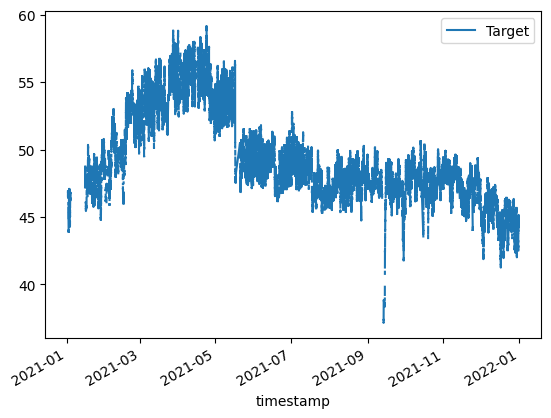

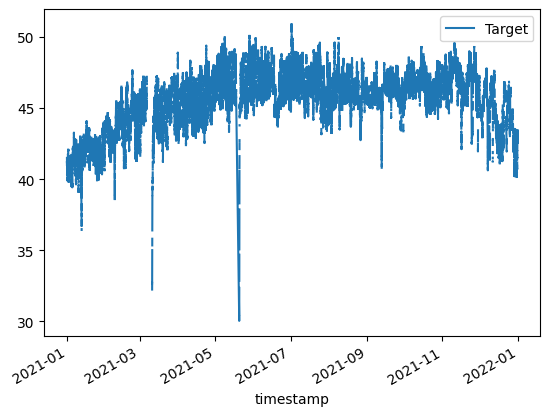

In [76]:
tt01.plot(x='timestamp', y='Target')
tt158.plot(x='timestamp', y='Target');

In [78]:
tt01_i = tt01['Target'].interpolate(method='linear')

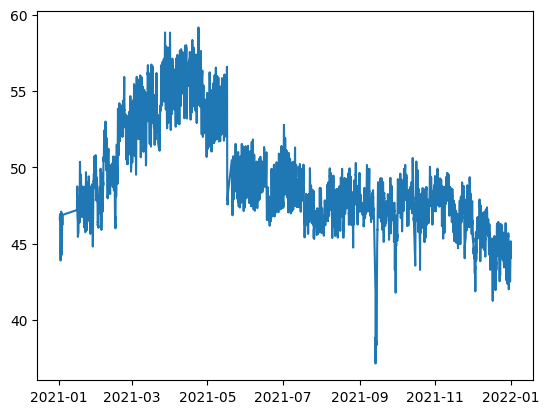

In [83]:
plt.plot(tt01.timestamp, tt01_i, label='interpolated')

In [ ]:
# have to do something about outliers...

## Linear Interpolation of Temp

In [85]:
df.timestamp  = pd.to_datetime(df.timestamp)
df.sort_values(by='timestamp', inplace=True)
df = df[['timestamp', 'turbine_id', 'Target']]
df.head()

,timestamp,turbine_id,Target
45421,2021-01-01 00:01:00,Turbine_108,43.430870
658721,2021-01-01 00:02:00,Turbine_120,40.715544
545675,2021-01-01 00:03:00,Turbine_120,40.706413
772206,2021-01-01 00:04:00,Turbine_139,40.769313
245502,2021-01-01 00:06:00,Turbine_158,NaN


In [86]:
df.isna().sum()

timestamp          0
turbine_id         0
Target        303202
dtype: int64

In [88]:
dfi = df['Target'].interpolate(method='linear')
dfi.head()

45421     43.430870
658721    40.715544
545675    40.706413
772206    40.769313
245502    41.650291
Name: Target, dtype: float64

In [112]:
df.reset_index()

Int64Index([ 45421, 658721, 545675, 772206, 245502, 171257,  33344,  12224,
            790434, 375613,
            ...
            760931, 706371, 557887, 118554, 540920, 554025,  83942, 668082,
            214355, 545409],
           dtype='int64', length=1212806)

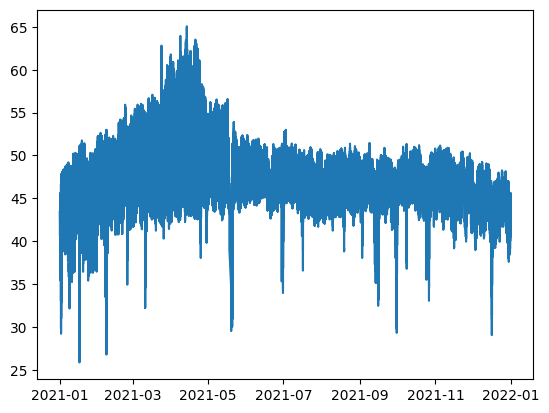

In [90]:
plt.plot(df.timestamp, dfi, label='interpolated')

In [110]:
test_data.index

RangeIndex(start=0, stop=303202, step=1)

In [109]:
simply_interpolated = dfi.loc[test_data.index]
simply_interpolated

0         47.582787
0         49.696873
1         46.070328
1         43.345530
2         39.989236
            ...    
303199    48.283113
303200    47.127800
303200    44.427677
303201    45.488581
303201    45.672899
Name: Target, Length: 606404, dtype: float64

In [105]:
submission = pd.DataFrame(columns=['Target'])
submission['Target'] = simply_interpolated
submission

,Target
0,47.582787
0,49.696873
1,46.070328
1,43.345530
2,39.989236
...,...
303199,48.283113
303200,47.127800
303200,44.427677
303201,45.488581


In [107]:
submission.to_csv('../submissions/simply_interpolated.csv',  index=False)

In [108]:
simply_interpolated.shape

(606404,)